
Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None

Summary Statistics:
            gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.

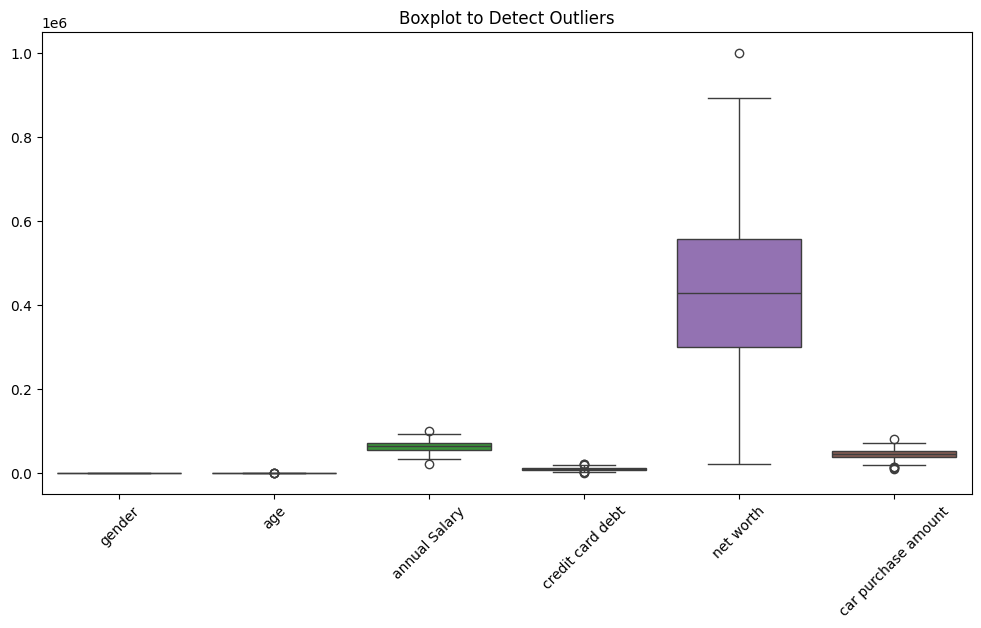


Outliers Removed: 8


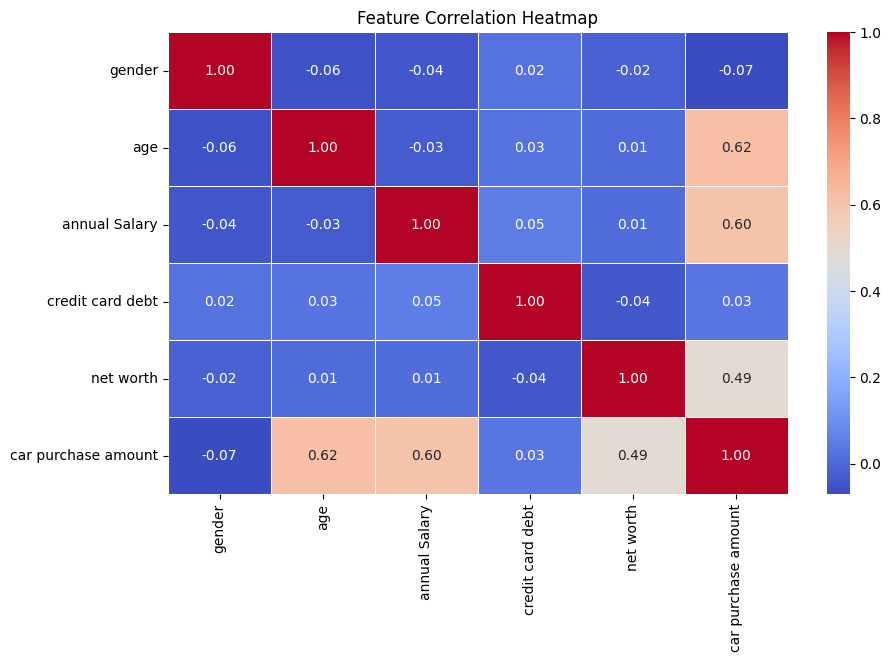

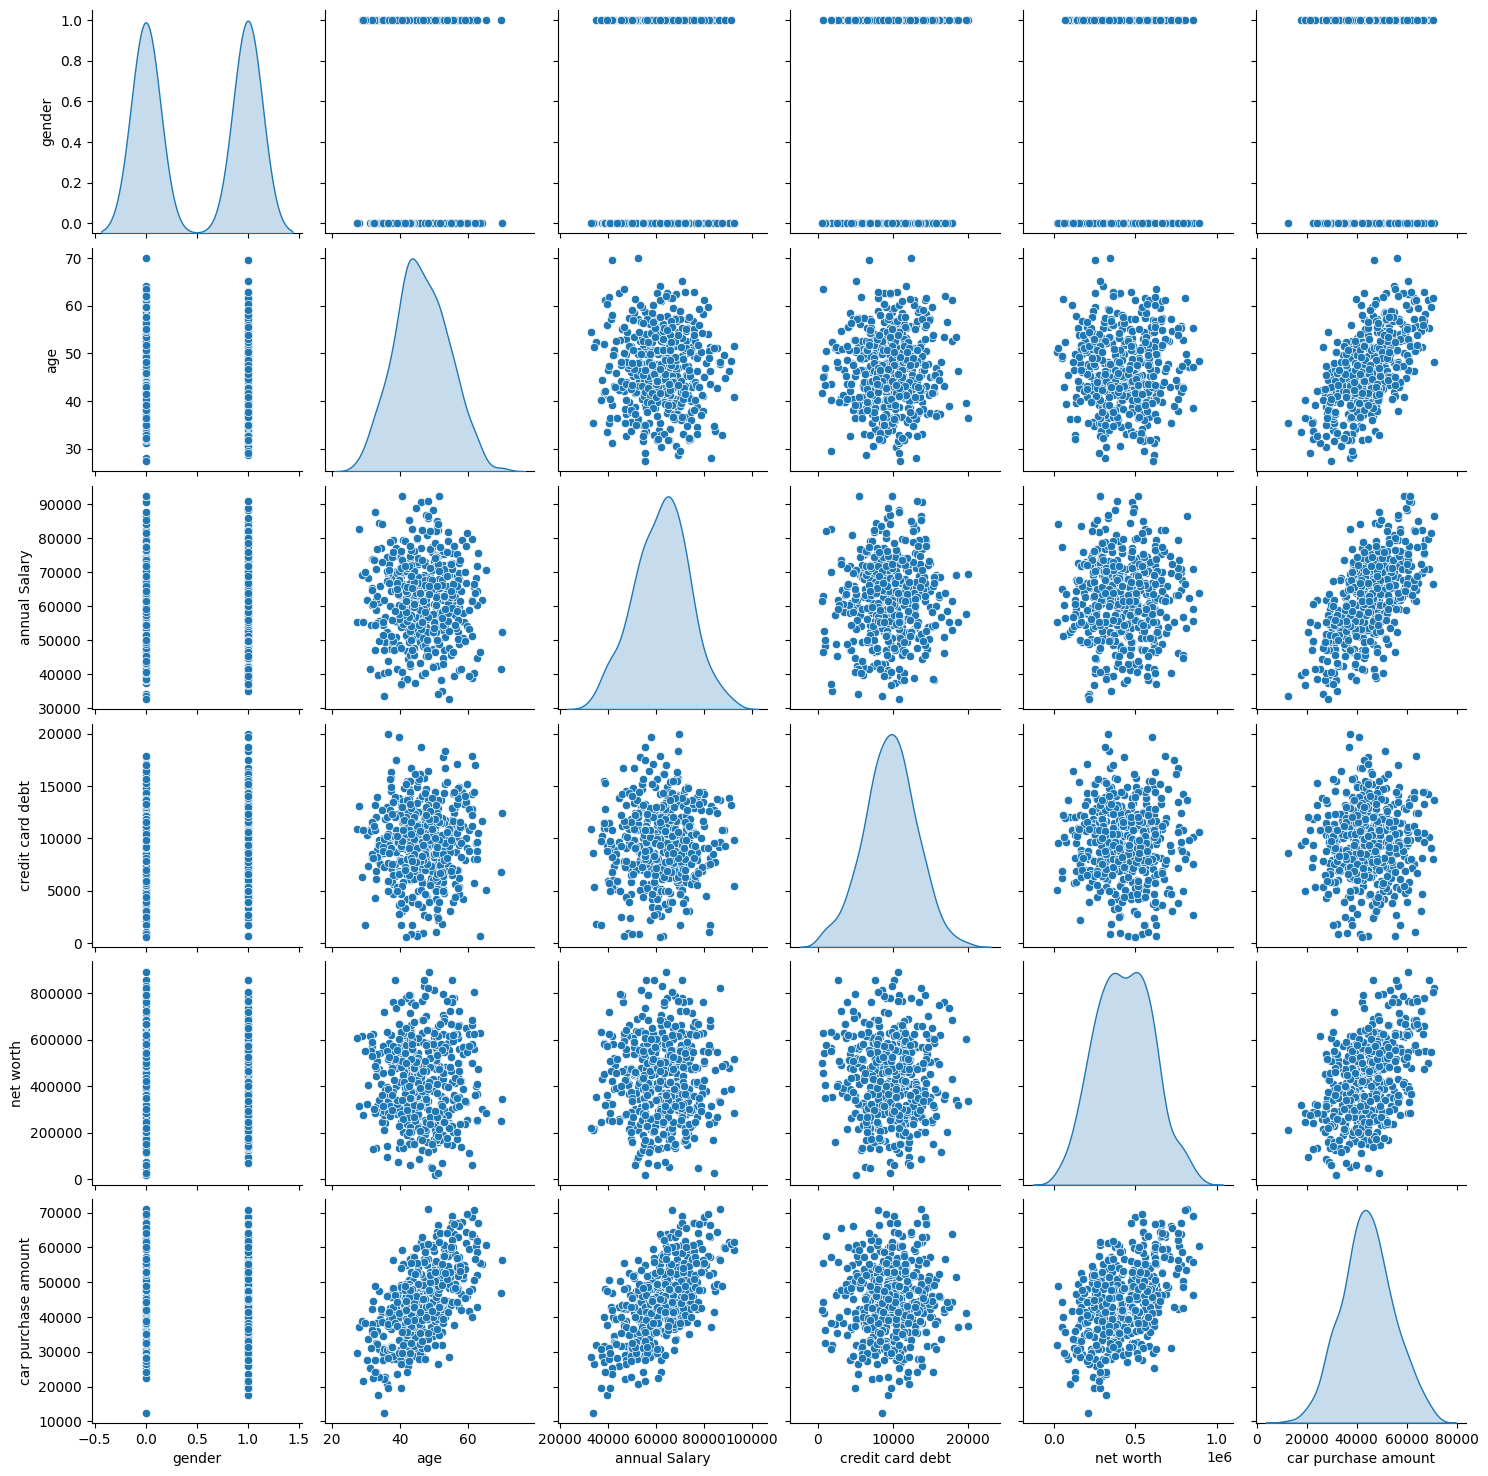


EDA completed and cleaned datasets saved (StandardScaler & MinMaxScaler).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
# Load the dataset
file_path = "/content/car_purchasing .csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")
# Display basic dataset info
def dataset_overview(df):
    print("\nDataset Overview:\n")
    print(df.info())
    print("\nSummary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())
dataset_overview(df)
# Drop unnecessary columns
drop_columns = ["customer name", "customer e-mail", "country"]
df = df.drop(columns=drop_columns)
print(f"\nDropped Columns: {drop_columns}")
# Handle missing values (if any)
df = df.dropna()
print("\nMissing values handled.")
# Detect outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()
# Detect and remove outliers using Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).sum().sum()
df = df[(z_scores < outlier_threshold).all(axis=1)]
print(f"\nOutliers Removed: {outliers}")
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# Pairplot for feature relationships
sns.pairplot(df, diag_kind="kde")
plt.show()

# Feature scaling (StandardScaler & MinMaxScaler)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaled_standard = scaler_standard.fit_transform(df.drop(columns=["car purchase amount"]))
scaled_minmax = scaler_minmax.fit_transform(df.drop(columns=["car purchase amount"]))

df_standard = pd.DataFrame(scaled_standard, columns=df.drop(columns=["car purchase amount"]).columns)
df_minmax = pd.DataFrame(scaled_minmax, columns=df.drop(columns=["car purchase amount"]).columns)
df_standard["car purchase amount"] = df["car purchase amount"].values
df_minmax["car purchase amount"] = df["car purchase amount"].values

# Save cleaned datasets
df_standard.to_csv("cleaned_sales_data_standard.csv", index=False)
df_minmax.to_csv("cleaned_sales_data_minmax.csv", index=False)

print("\nEDA completed and cleaned datasets saved (StandardScaler & MinMaxScaler).")


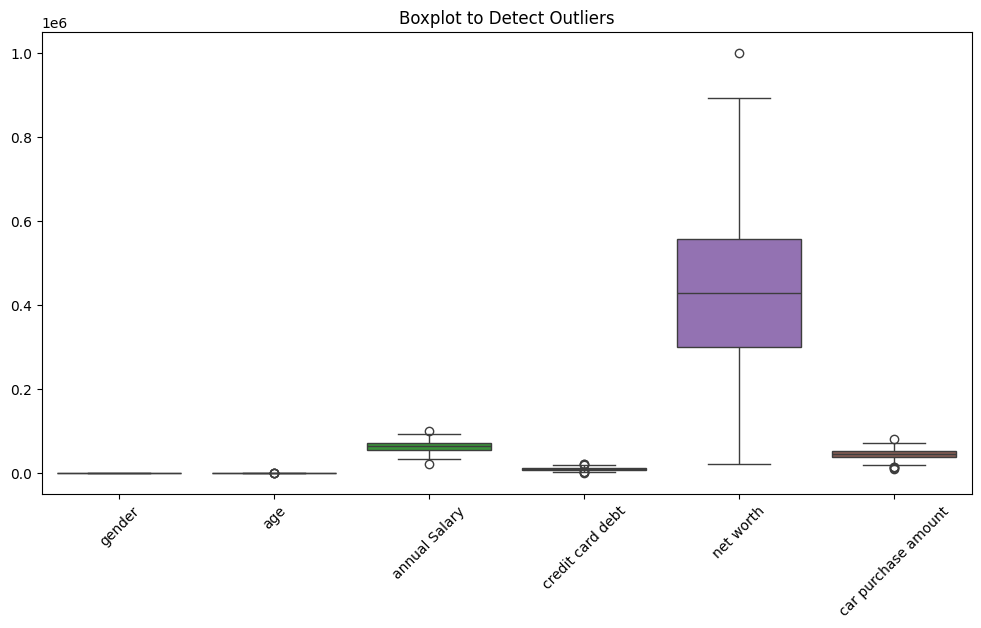


Outliers Removed: 15


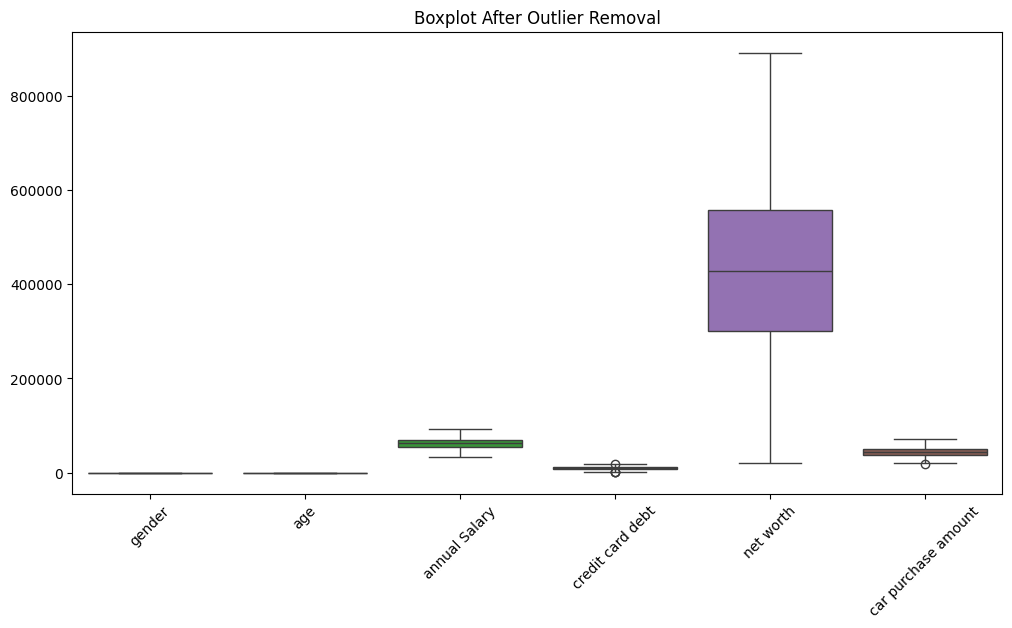


Outliers detected, removed, and cleaned dataset saved.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = "car_purchasing .csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop unnecessary columns
drop_columns = ["customer name", "customer e-mail", "country"]
df = df.drop(columns=drop_columns)

# Detect outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

# Remove outliers using IQR method
df_cleaned = remove_outliers_iqr(df.select_dtypes(include=[np.number]))
print(f"\nOutliers Removed: {df.shape[0] - df_cleaned.shape[0]}")

# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Removal")
plt.show()

# Save cleaned dataset
df_cleaned.to_csv("cleaned_sales_data.csv", index=False)

print("\nOutliers detected, removed, and cleaned dataset saved.")
